In [1]:
%load_ext autoreload
%autoreload 2
import os
from SRtools import sr_mcmc as srmc
import argparse
from SRtools import config_lib as cl
from SRtools import deathTimesDataSet as dtds
import ast
from SRtools import readResults as rr
from SRtools import readResultsBaysian as rrb
import corner
import matplotlib.pyplot as plt
import matplotlib
from SRtools import SRmodellib as sr
from SRtools import SRmodellib_lifelines as srl
import emcee
import numpy as np
from SRtools import SR_hetro as srh
from SRtools import presets
import matplotlib.pyplot as plt
from SRtools import readResultsBaysian as rrb
from matplotlib import image as mpimg
from matplotlib import offsetbox
from SRtools import utils
from SRtools import plotting_utils as pu

In [2]:
save_fig = True
filetype = 'pdf'

In [3]:
path ='results/summery_mode.csv'

In [4]:
lifespan_param = 'best fit no ext hazard_MedianLifetime'

In [5]:
# columns=[
#     'ecoli',
#     'mice_M', 'mice_F', 'yeast', 'celegance', 
#     'cats_BPH', 
#     'drosophila_853', 'drosophila_707', 'drosophila_441', 'drosophila_217',
#     'humans_M_combined', 'humans_F_combined', 
#     'Staffy_vetCompass', 'Labradors_vetCompass', 'Jack_Russell_vetCompass', 'German_Shepherd_vetCompass'
#     ]

columns = ['mice_F','mice_M','yeast','ecoli','cats_vp_M','cats_vp_F',
        'drosophila_853','drosophila_707','drosophila_441','drosophila_217',
        'Sweden_M_1910_hetro','Sweden_F_1910_hetro','Denmark_M_1900_hetro','Denmark_M_1890_hetro',
        'Staffy_vetCompass','Labradors_vetCompass','Jack_Russell_vetCompass','German_Shepherd_vetCompass',
        'Denmark_F_1890_hetro', 
        'celegans','Denmark_F_1900_hetro','Guiniea_pig_VC','combined_human_F','combined_human_M']

values_by_param, ci_by_param, selected_value_columns = utils.read_summary_csv(path,columns=columns)
# sil = utils.get_summery_csv_df(columns=columns)

In [6]:
print(values_by_param.keys())

dict_keys(['xc/eta', 'beta/eta', 'xc^2/epsilon', 'xc', 'eta', 'beta', 'epsilon', 'sqrt(xc/eta)', 's= eta^0.5*xc^1.5/epsilon', 'beta*xc/epsilon', 'eta*xc/epsilon', 'Fx=beta^2/eta*xc', 'Dx =beta*epsilon/eta*xc^2', 'Pk=beta*k/epsilon', 'Fk=beta^2/eta*k', 'Dk =beta*epsilon/eta*k^2', 'Fk^2/Dk=beta^3/eta*epsilon', 'epsilon/beta^2', 'k/beta', 'k^2/epsilon', 'best fit no ext hazard_MedianLifetime', 'best fit no ext hazard_MaxLifetime', 'best fit_MedianLifetime', 'best fit_MaxLifetime', 'data_MedianLifetime', 'data_MaxLifetime', 'ML_lnprob', 'ExtH', 'eta/xc', 'beta/xc', 'epsilon/xc^2', 'k/xc'])


In [7]:


file_image_dict={
    'mice_F': 'silhouetts/Mice.jpg',
    'celegans': 'silhouetts/Celegance.jpeg',
    'Labradors_vetCompass': 'silhouetts/Labrador.jpg',
    'drosophila_441': 'silhouetts/drosophila.jpeg',
    'cats_vp_M': 'silhouetts/cat silhouette.jpeg',
    'combined_human_F': 'silhouetts/man silhouette.jpeg',
    'yeast': 'silhouetts/yeast.jpeg',
    'ecoli': 'silhouetts/ecoli.jpeg',
    'Guiniea_pig_VC': 'silhouetts/guinea_pig_silhouette.jpeg',
}



fact_zoom=0.8
x_offset_fact =1.2
zooms = {
    'mice_F': 0.015*fact_zoom,
    'celegans': 0.0125*fact_zoom,
    'Labradors_vetCompass': 0.02*fact_zoom,
    'drosophila_441': 0.01*fact_zoom,
    'cats_vp_M': 0.02*fact_zoom,
    'combined_human_F': 0.025*fact_zoom,
    'yeast': 0.01*fact_zoom,
    'ecoli': 0.01*fact_zoom,
    'Guiniea_pig_VC': 0.01*fact_zoom,
}


directions = {
    'mice_F': -1,
    'celegans': -1,
    'Labradors_vetCompass': -1,
    'drosophila_441': 1,
    'cats_vp_M': 1,
    'combined_human_F': 1,
    'yeast': 1,
    'ecoli': 1,
    'Guiniea_pig_VC': 1,
}



offsets_eta = {
    'mice_F': [1*x_offset_fact,-3],
    'celegans': [2*x_offset_fact,0],
    'Labradors_vetCompass': [2.5*x_offset_fact,0],
    'drosophila_441': [3*x_offset_fact,0],
    'cats_vp_M': [3*x_offset_fact,-3.5],
    'combined_human_F': [3*x_offset_fact,-1.5],
    'yeast': [3.2*x_offset_fact,0],
    'ecoli': [3.5*x_offset_fact,-1],
    'Guiniea_pig_VC': [3.5*x_offset_fact,-1],
}

# directions = {
#     'Mice_F': 0,
#     'Celegance': 0,
#     'Dog_Labrador': 0,
#     'Drosophila': 0,
#     'Cats': 0,
#     'Human_M': 0,
# }



plot_props_eta = rrb.getPlotPropsImages(file_image_dict=file_image_dict, zooms=zooms,offset=offsets_eta,directions=directions)






offsets_beta_eta = {
    'mice_F': [1,-1.5],
    'celegans': [2.,0],
    'Labradors_vetCompass': [2.5,0],
    'drosophila_441': [3,1],
    'cats_vp_M': [3,0],
    'combined_human_F': [2.8,0],
    'yeast': [3.2*x_offset_fact,1],
    'ecoli': [3.5*x_offset_fact,0],
    'Guiniea_pig_VC': [3.5*x_offset_fact,0],
}




plot_props_beta_eta = rrb.getPlotPropsImages(file_image_dict=file_image_dict, zooms=zooms,offset=offsets_beta_eta,directions=directions)



In [8]:
alpha_1 =0.2
color = 'black'
marker_size = 6
markeredgewidth = 1
marker = 'o'

plot_props_all = {
    'combined_human_M': {'color': color, 'marker': marker, 'label': 'Human Male', 'alpha': alpha_1, 'markersize': marker_size, 'markeredgewidth': markeredgewidth},
    'combined_human_F': {'color': color, 'marker': marker, 'label': 'Human Female', 'alpha': alpha_1, 'markersize': marker_size, 'markeredgewidth': markeredgewidth},
    'ecoli': {'color': color, 'marker': marker, 'label': 'E. coli', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Jack_Russell_vetCompass': {'color': color, 'marker': marker, 'label': 'Jack Russell', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Labradors_vetCompass': {'color': color, 'marker': marker, 'label': 'Labrador', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Staffy_vetCompass': {'color': color, 'marker': marker, 'label': 'Staffy', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'German_Shepherd_vetCompass': {'color': color, 'marker': marker, 'label': 'German Shepherd', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'cats_vp_M': {'color': color, 'marker': marker, 'label': 'Cats', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'cats_vp_F': {'color': color, 'marker': marker, 'label': 'Cats', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'mice_F': {'color': color, 'marker': marker, 'label': 'Mice Female', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'mice_M': {'color': color, 'marker': marker, 'label': 'Mice Male', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'celegans': {'color': color, 'marker': marker, 'label': 'C. elegans', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'drosophila_853': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 853', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'drosophila_441': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 441', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'drosophila_707': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 707', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'drosophila_217': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 217', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'yeast': {'color': color, 'marker': marker, 'label': 'Yeast', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Guiniea_pig_VC': {'color': color, 'marker': marker, 'label': 'Guinea Pig', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
}

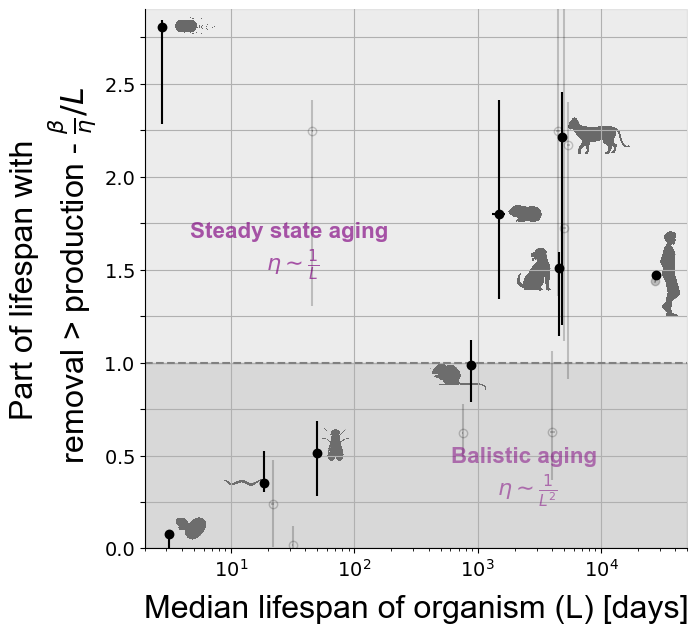

In [9]:
from matplotlib.patheffects import withStroke

sf =0.7

fig_size = (10*sf,10*sf) 
fig, ax = plt.subplots(figsize=fig_size)
# fig.subplots_adjust(wspace=0.4) 




# if i in [8,7,6]:
#     dparam = idict[20]
# elif i in [11,2,3]:
#     mparam = idict[20]
# elif i in[1]:
#     mparam = [idict[20],idict[20]]

title_font = {'fontname':'Arial', 'size':f'{22*sf}', 'color':'black', 'weight':'normal'}
axis_font = {'fontname':'Arial', 'size':f'{33*sf}','weight':'normal'}   
text_font = {'fontname':'Arial', 'size':f'{23*sf}','weight':'bold','horizontalalignment':'center','verticalalignment':'center','color':'purple'}

npad =10



i =6
dparam = lifespan_param
mparam = None
xlim =[2,50000]
ylim = [0,2.9]
#color the part of the plot below y=1 in light grey
_, x,y,_,_,_, fig,plot_props0 =pu.plotParams2D(path,ax=ax,param2='beta/eta',multiply_param2=mparam,divide_by_param2=dparam,param1=lifespan_param,divide_by_param1=None,yscale='linear',xscale='log',
                                               full_output=True,legend = False,plot_props_images=plot_props_beta_eta,best_fit=False,image_color='black')

_, _,_,_,_,_, fig,plot_props0 =pu.plotParams2D(path,ax=ax,param2='beta/eta',multiply_param2=mparam,divide_by_param2=dparam,param1=lifespan_param,divide_by_param1=None,yscale='linear',xscale='log',
                                               full_output=True,legend = False,plot_props=plot_props_all,best_fit=False)
# _, x,y,_,_,_, fig,plot_props0 =rr.plotParams2D(sil,ax=ax,param2=idict[i],multiply_param2=mparam,divide_by_param2=dparam,param1=idict[20],divide_by_param1=None,yscale='linear',xscale='log',
#                                                full_output=True,legend = False,plot_props_images=plot_props_beta_eta,best_fit=False,image_color='darkgreen',drop_images=True)
#order x and y by x
x,y = zip(*sorted(zip(x,y)))
x=x[1:]
y=y[1:]
# #fit a sigmoid to the data
# from scipy.optimize import curve_fit
# def sigmoid(x, x0, k):
#     y = 1.5 / (1 + np.exp(-k*(np.log(np.log(x))-np.log(np.log(x0)))))
#     return y
# popt, pcov = curve_fit(sigmoid, x, y)
# x = np.linspace(x[0], x[-1], 100)
# ax.plot(x, sigmoid(x, *popt), color='black', linestyle='-', linewidth=2, alpha=0.2, zorder=1)
# # ax.plot(x,y, color='black', linestyle='-', linewidth=2, alpha=0.2, zorder=1)
ax.set_title('Damage production parameter $\\eta$ inversely correlates with lifespan', pad=ax.title.get_position()[1] + npad, **title_font)
# rr.plotParams2D(sil,ax=ax,param2=idict[i],multiply_param2=mparam,divide_by_param2=dparam,param1=idict[20],divide_by_param1=None,yscale='log',xscale='log',full_output=False,legend = False)
ax.set_ylabel('Part of lifespan with\n removal > production - '+ r'$\frac{\beta}{\eta}/L$', **axis_font)
ax.set_xlabel('Median lifespan of organism (L) [days]', labelpad=10, **axis_font)  # Added labelpad for small padding
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.fill_between(xlim, ylim[0], 1, color='grey', alpha=0.3,zorder =1)
ax.fill_between(xlim, 1,ylim[1], color='grey', alpha=0.15,zorder =1)
tx = np.exp((np.log(xlim[0])+np.log(xlim[1]))/2)

glow_effect = [withStroke(linewidth=1, foreground='green', alpha=0.3)]
glow_effect = None
ax.text(8*tx,0.38,'Balistic aging \n'+r'$\eta\sim\frac{1}{L^2}$',alpha=0.5,**text_font, path_effects=glow_effect)
ax.text(0.1*tx,1.6,'Steady state aging \n'+r'$\eta\sim\frac{1}{L}$',alpha=0.65,**text_font, path_effects=glow_effect)



ax.set_yscale('linear')
ax.axhline(1, color='gray', linestyle='--')
#remove title
ax.title.set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=14)  # Set tick label size
#set the x tick labels to be [10^0,  ,10^2, , 10^4], and y tick labels to be [10^-4,  ,10^0, , 10^4]
ax.set_xticks([10, 100,1000 , 10000])
ax.set_xticklabels([r'$10^1$', r'$10^2$',r'$10^3$', r'$10^4$'])
ax.set_yticks([0,0.25,0.5,0.75, 1,1.25 ,1.5,1.75,2,2.25,2.5,2.75])
ax.set_yticklabels(['0.0','',r'$0.5$','', r'$1.0$','', r'$1.5$','','2.0','',r'$2.5$',''])
if save_fig:
    fig.savefig(f'plots/Fig_BetaEta_Silhouetts.{filetype}',bbox_inches='tight',format=filetype,transparent=True)
